In [29]:
import numpy as np
import random
import matplotlib.pyplot as plt
from multiprocessing import Pool

In [39]:
def sim(seed,T,spike_train):
    random.seed(seed)
    
    dt=T[1]-T[0]
    
    C_0=0.6
    V_0=1.8
    tau_c=15
    tau_v=30
    alpha=0.1
    beta_0=0.1
    beta_s=0.005 #er refilling slope
    tau_er=10

    #T=np.linspace(0,2,1001)

    #input spike times
    
    release=np.zeros(spike_train.shape,dtype=np.bool)
    
    C=np.zeros(T.shape)
    V=np.zeros(T.shape)
    beta=np.zeros(T.shape)+beta_0
    P_s=np.zeros(T.shape)
    
    i=0
    for j,t in enumerate(T):
        #er Ca2+ depletion. beta is er contribution factor.
        beta[j]=beta[j-1]+(beta_0-beta[j-1])*dt/tau_er
        
        #max(0,beta_0-beta_s*sum(np.exp(-(t-spike_train[:i])/tau_er)))
        
        #facilitation with extracellular 'alpha' and intracellular 'beta' contributions
        C[j]=C_0+(alpha+beta[j])*(sum(np.exp(-(t-spike_train[:i])/tau_c)))
        
        #depression due to resource (vesicle) depletion 
        V[j]=max(0,V_0-sum(release[:i]*np.exp(-(t-spike_train[:i])/tau_v)))
        
        #vesicle release probability
        P_s[j]=1-np.exp(-C[j]*V[j])
        
        if i<len(spike_train):
            if t>=spike_train[i]:
                beta[j]=max(beta_0/7,beta[j]-beta_s)
                u=random.uniform(0,1)
                if u < P_s[j]:
                    release[i]=1
                i+=1
    return np.stack([C,V,beta,P_s]),release

In [40]:
#C,V,release=sim()

T=np.linspace(0,2,1001)
spike_train=np.array([0.0022, 0.0522, 0.1022, 0.1522, 0.2023, 0.2522, 0.3021, 0.3522,
       0.4022, 0.4522, 0.5022, 0.5523, 0.6022, 0.6522, 0.7023, 0.7522,
       0.8022, 0.8522, 0.9022, 0.9522])


N=100

P=Pool(8)
datas,releases=zip(*P.starmap(sim,zip(range(N),N*[T],N*[spike_train])))
data=np.average(np.array(datas),axis=0)
release=np.average(np.array(releases),axis=0)
#spike_train=np.average(np.array(spike_trains),axis=0)

In [41]:
C=data[0,:]
V=data[1,:]
beta=data[2,:]
P_s=data[3,:]
data.shape

(4, 1001)

Text(0.5, 1.0, 'Releases')

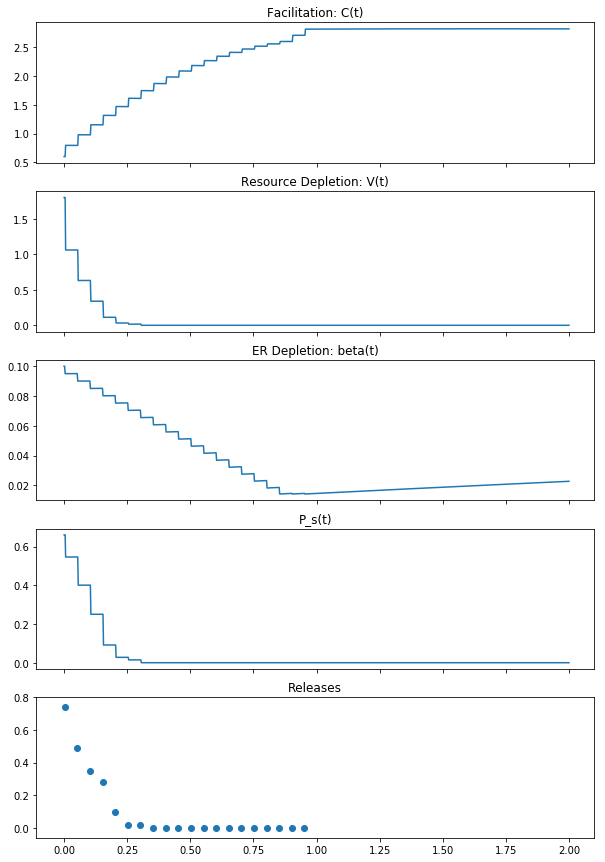

In [42]:
fig, ax = plt.subplots(nrows=5,ncols=1,sharex=True,figsize=(10,15))

ax[0].plot(T,C)
ax[0].set_title("Facilitation: C(t)")

ax[1].plot(T,V)
ax[1].set_title("Resource Depletion: V(t)")

ax[2].plot(T,beta)
ax[2].set_title("ER Depletion: beta(t)")

ax[3].plot(T,P_s)
ax[3].set_title("P_s(t)")

ax[4].scatter(spike_train,release)
ax[4].set_title("Releases")

## Loading mcell results

In [209]:
res_loc="/home/kabir/Project/tripartiteSynapse/results/freq/"
data={}
peaks={}

fnames=["R150control20hz","R150ER2x20hz","R150ER3x20hz","R300ER2x20hz","R300ER3x20hz"] #,"R150ER2x20hz" "R150ER3x20hz"
for sim_type in fnames:
    loc=res_loc+sim_type+"/result"
    print(loc)
    data[sim_type]=np.loadtxt(loc)
    peaks[sim_type]=np.loadtxt(res_loc+sim_type+"/caStat.dat").T[1]

/home/kabir/Project/tripartiteSynapse/results/freq/R150control20hz/result
/home/kabir/Project/tripartiteSynapse/results/freq/R150ER2x20hz/result
/home/kabir/Project/tripartiteSynapse/results/freq/R150ER3x20hz/result
/home/kabir/Project/tripartiteSynapse/results/freq/R300ER2x20hz/result
/home/kabir/Project/tripartiteSynapse/results/freq/R300ER3x20hz/result


In [217]:
data["R150control20hz"].T[1]


array([0.0744, 0.2672, 0.3853, 0.4909, 0.6266, 0.6735, 0.6393, 0.6996,
       0.688 , 0.6778, 0.6242, 0.5712, 0.4756, 0.4314, 0.3758, 0.312 ,
       0.2895, 0.2487, 0.2514, 0.263 ])

In [215]:
peaks["R300ER3x20hz"]

array([0.0022, 0.0523, 0.1022, 0.1522, 0.2023, 0.2522, 0.3022, 0.3523,
       0.4022, 0.4522, 0.5022, 0.5522, 0.6022, 0.6522, 0.7023, 0.7522,
       0.8022, 0.8522, 0.9022, 0.9522])

In [95]:
C_0=0.6
V_0=1.8
tau_c=15
tau_v=30
alpha=0.1
beta_0=0.1
beta_s=0.005 #er refilling slope
tau_er=10

1-np.exp(-((alpha+beta_0)*C_0*V_0))

0.19426469812652036

In [46]:
#input spike times
spike_train=np.array([1,2,3,4,5,6,7,8,9,10])
release=np.zeros(10,dtype=np.bool)

In [2]:
C_0=0.1
V_0=1.8
tau_c=15
tau_v=30
alpha=1

In [4]:
for i,t in enumerate(spike_train):
    C=C_0+alpha*sum(np.exp((t-spike_train[:i])/tau_c))
    V=V_0-sum(np.exp(t-release[:i]/tau_v))
    P_s=1-np.exp(-C*V)
    if uniform(0,1) < P_s:
        release[i]=1